# *Mechanical Vibration*

In this notebook, we are going to cover basics of Mechanical Vibration.
We will first look at mathematical model and then, we will write a code to simulate it.

### Mathematical Model
The second-order equation of motion is:
$$m\ddot{x} + c\dot{x} + kx = F(t)$$

By defining the state vector $\mathbf{y} = [\dot{x}, x]^T$, we transform this into a first-order system:

$$\mathbf{A}\dot{\mathbf{y}} + \mathbf{B}\mathbf{y} = \mathbf{F}(t)$$

Where:
$$\mathbf{A} = \begin{bmatrix} m & 0 \\ 0 & 1 \end{bmatrix}, \quad 
\mathbf{B} = \begin{bmatrix} c & k \\ -1 & 0 \end{bmatrix}, \quad 
\mathbf{F}(t) = \begin{bmatrix} F(t) \\ 0 \end{bmatrix}$$

Solving for the derivative gives:
$$\dot{\mathbf{y}} = \mathbf{A}^{-1} (\mathbf{F}(t) - \mathbf{B}\mathbf{y})$$

Using Euler method, we can compute displacement as follows:

$$y_{new} = y_{old} + \frac{dy}{dt}dt$$

In [83]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Initial Parameters
m = 5.0
k = 20.0
c_under = 0.5 #Under damped
c_critical = 1 #Critically damped
c_over = 2 #Over damped
F0 = 2 #External force amplitute
initial_state = np.array([0.0, 1.0]) # [velocity, displacement]

In [ ]:
#Defining a function
def vibration(m, k, c, initial_state, title, F0=0, omega=1.0):
    y = initial_state #Initial state
    
    y_calculated = [] #to store displacement
    force = [] #to store force
    
    delta_t = 0.01 #time increment
    time = np.arange(0.0, 40.0, delta_t) #time vector
    
    # State-space matrices
    # A * dy/dt + B * y = F
    A = np.array([[m, 0], [0, 1]])
    B = np.array([[c, k], [-1, 0]])
    A_inv = inv(A)

    #Time integration
    for t in time:
        # External function function (active for first 10 seconds)
        f_val = F0 * np.cos(omega * t) if t <= 10 else 0.0
        F_vec = np.array([f_val, 0.0])

        # Euler sceme: 
        #y_new = y_old + dt * (dy/dt), where
        # dy/dt = A_inv @ (F_vec - B @ y)
        
        dydt = A_inv.dot(F_vec - B.dot(y))
        y = y + (dydt*delta_t)
        
        y_calculated.append(y[1]) 
        force.append(f_val)

    # Plotting
    plt.figure(figsize=(7, 5))
    plt.plot(time, y_calculated, label="Displacement (x)")
    plt.plot(time, force, label="Force (F)", linestyle='--')
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.show()

    return None

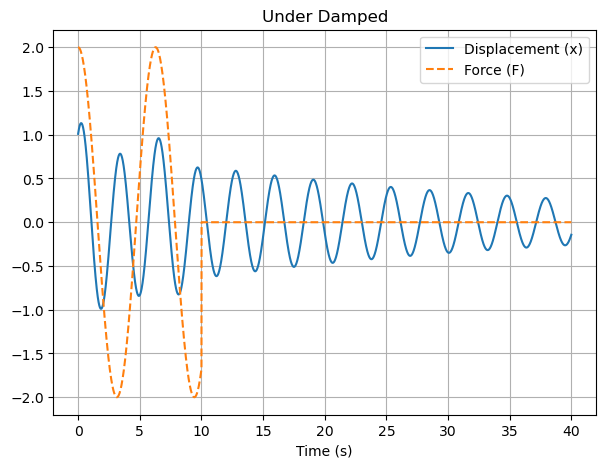

In [80]:
#Under damped system, c<1
vibration(m, k, c_under, initial_state, "Under Damped", F0=F0, omega=1.0)

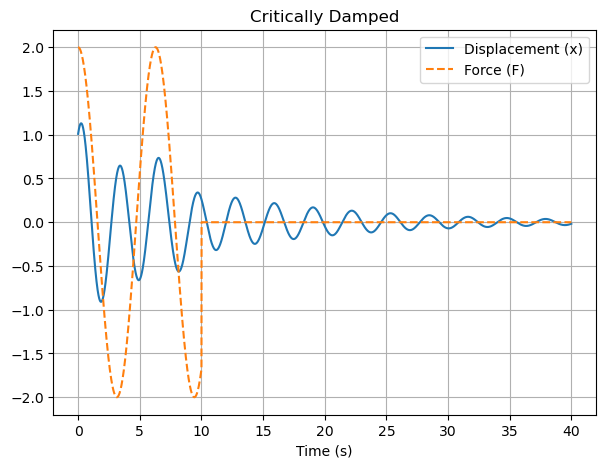

In [81]:
#Critically damped system, c=1
vibration(m, k,c_critical, initial_state,"Critically Damped", F0=F0, omega=1.0)

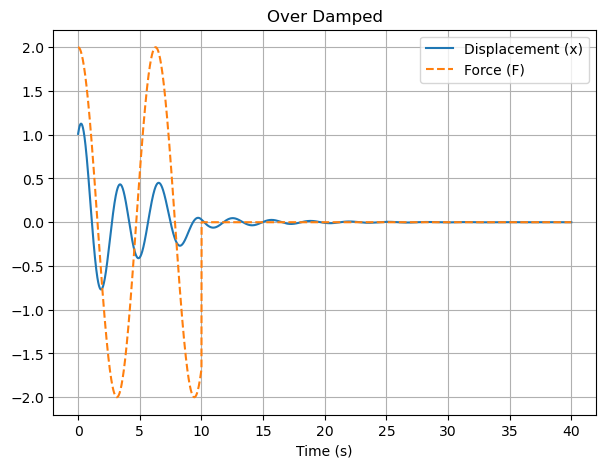

In [82]:
#Over damped system, c>1
vibration(m, k,c_over,initial_state, "Over Damped", F0=F0, omega=1.0)